In [97]:
import numpy as np
import math as mt
import statistics as st

def pmodel(noValues, p, slope):
    
    # Calculate length of time series
    noOrders = mt.ceil(mt.log2(noValues))
    
    #noValuesGenerated = 2**(noOrders)
    
    # y is the time series generated with the p-model.
    y = 1
        
    for i in range(0,noOrders):
        y = next_step_1d(y,p)
        
    if slope:
        fourierCoeff = fractal_spectrum_1d(noValues, slope/2)
        meanVal = st.mean(y)
        stdy = st.stdev(y)

        x = np.fft.ifft(y-meanVal)         #Calculate the Fourier coefficients of the original p-model time series

        phase = np.angle(x)                   #Calculate the phases, as these are kept intact, should not be changed by the Fourier filter.
        x = fourierCoeff * np.exp(1j*phase)   #Calculate the complex Fourier coefficients with the specified spectral slope, and the phases of the p-model.

        x = np.real(np.fft.fft(x))    #Generate the fractionally integrated time series
        x = x * stdy / st.stdev(x)
        x = x + meanVal
    else:
        x = y
    return(np.round (x,decimals=5))


In [98]:
def next_step_1d(y,p):
    tam = np.size(y)
        
    np.random.seed(0)
    
    y2 = np.zeros(tam*2)
    sign = np.random.rand(tam)-0.5
    sign = sign/np.abs(sign)
    
    y2 [0:(2*tam-1):2] = y + sign*(1-2*p)*y
    y2 [1:(2*tam):2] = y - sign*(1-2*p)*y
    
    return y2                

In [99]:
def fractal_spectrum_1d(noValuesF, slope):

    ori_vector_size = noValuesF
    ori_half_size = ori_vector_size/2
    
    a = np.zeros(ori_vector_size+1)
    ori_half_size = int(ori_half_size)
   
    for t2 in range(1,ori_half_size):
        
        index = t2 - 1
        t4 = 2 + ori_vector_size - t2
        
        if ( t4 > ori_half_size):
            t4 = t2

        if index <= 0:
            coeff = 0
        else:
            coeff = np.power(index, slope) 

        a[t2] = coeff
        a[t4] = coeff
        
    a[1] = 0
        
    return a[1:].T

In [100]:
vetor =  pmodel(4096,0.72,-0.75)

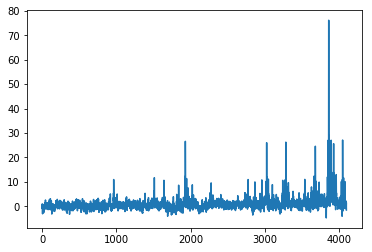

In [101]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.plot(vetor)
plt.show()

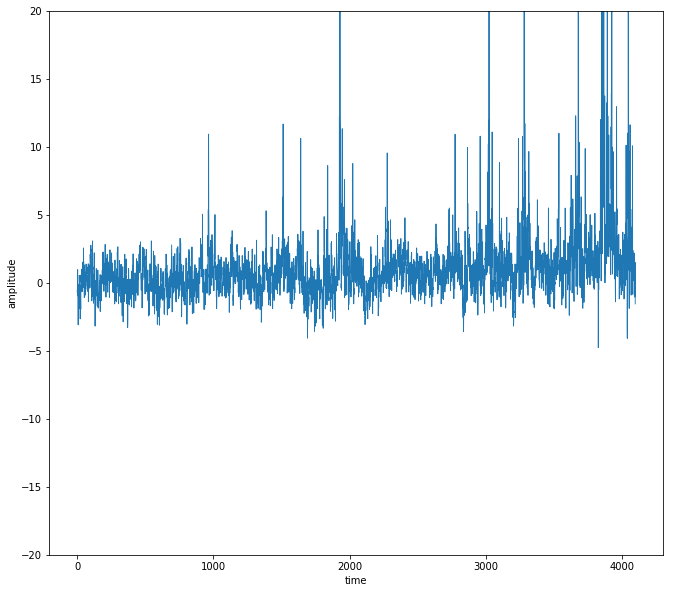

In [102]:
import thinkplot
from sklearn.preprocessing import normalize

#Normalizando dados
y = normalize(vetor[:,np.newaxis], axis=1).ravel()

fig = plt.figure(figsize = (11,10))
ax  = fig.add_subplot(111)

ax.plot(vetor, linewidth=0.9)

thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 ylim=[-20, 20],
                 legend=False)
plt.show()

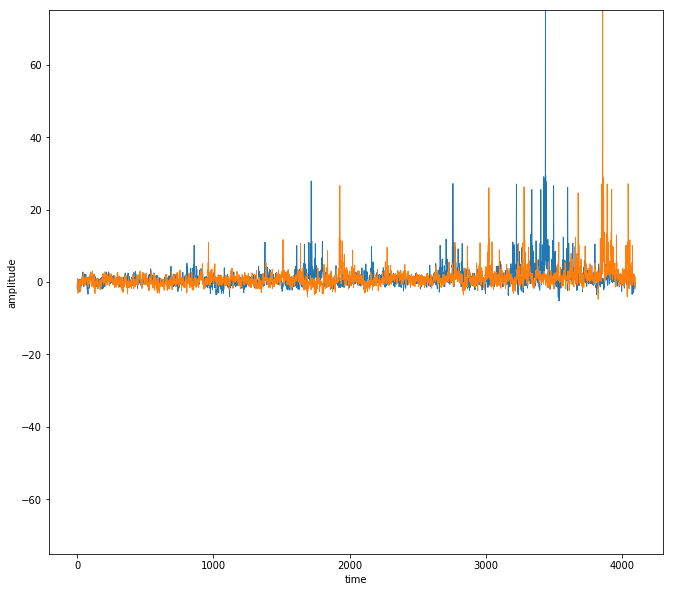

In [103]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/helvecio/vetor4096.csv', header=None)

fig = plt.figure(figsize = (11,10))
ax  = fig.add_subplot(111)

ax.plot(df, linewidth=0.9)
ax.plot(vetor, linewidth=0.9)

thinkplot.config(xlabel='time',
                 ylabel='amplitude',
                 ylim=[-75, 75],
                 legend=False)
plt.show()

